In [3]:
files = ! dir Alexander
files = [_.split('           ')[-1][8:] for _ in files if ('.png' in _)]

labels = []
for __ in range(len(files)):
    try:
        labels.append([float(_) for _ in files[__].split('[')[-1].split(']')[0].split(' ') if len(_) > 1])
    except:
        print('Error', __)

import numpy as np
np.set_printoptions(precision=5)
labels = np.array(labels)

In [4]:
labels+np.random.normal(0,0.0005, (len(labels), 2))

array([[ 0.04519, -0.58356],
       [ 0.04522, -0.58256],
       [ 0.04525, -0.58284],
       ...,
       [ 5.99969,  4.14571],
       [ 5.99995,  4.14668],
       [ 5.99937,  4.14601]])

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


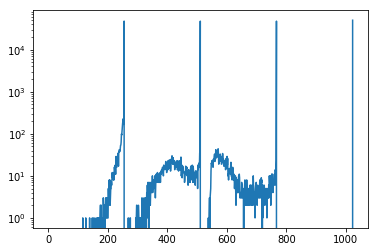

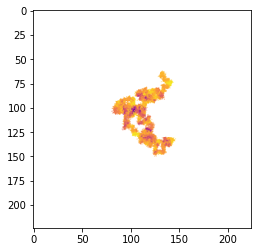

In [6]:
pil_im = Image.open('Alexander/'+files[np.random.randint(0, len(files))])
pil_im.thumbnail((224, 224))
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(pil_im.histogram())
plt.yscale('log')
plt.show()

plt.imshow(pil_im)
plt.show()
#plt.imshow(np.array(pil_im)[:,:,1])
#plt.show()
#plt.imshow(np.array(pil_im)[:,:,2])
#plt.show()
#plt.imshow(np.array(pil_im)[:,:,3])
#plt.show()

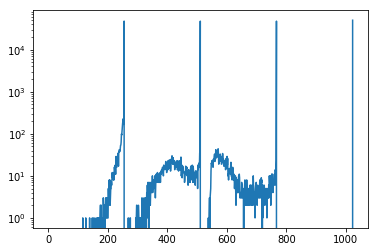

In [7]:
plt.plot(pil_im.histogram())
plt.yscale('log')

In [243]:
hist_list = []
random_idx_list = []
from tqdm import tqdm
for _ in tqdm(range(1000)):
    random_idx = np.random.randint(0, len(files))
    random_idx_list.append(random_idx)
    pil_im = Image.open('Alexander/'+files[random_idx])
    pil_im.thumbnail((224, 224))
    hist_list.append(pil_im.histogram())
hist_list = np.array(hist_list)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.12it/s]


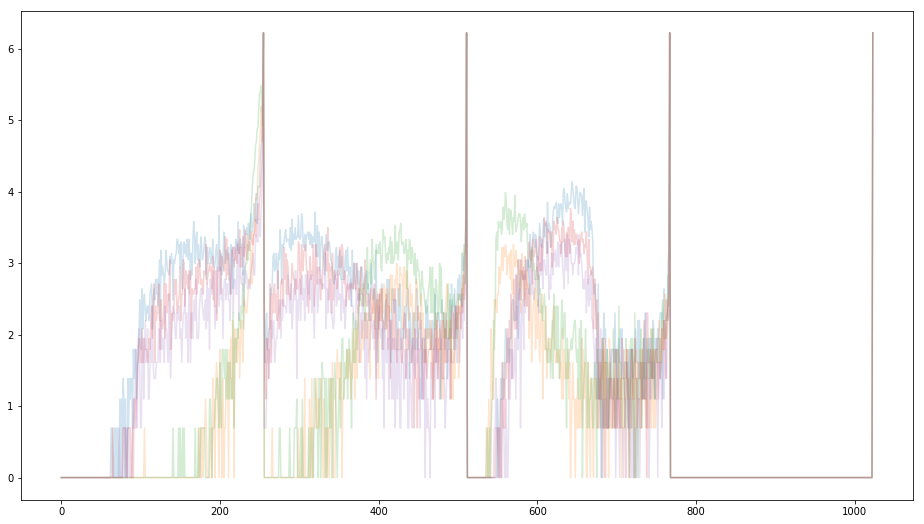

In [290]:
plt.figure(figsize=(16,9))
feature_from_hist = np.log(1+np.clip(hist_list, 0, np.max(hist_list)/100))
for _ in range(5):
    plt.plot(feature_from_hist[np.random.randint(0, len(hist_list))], alpha=0.2)

In [258]:
A = np.corrcoef(feature_from_hist)

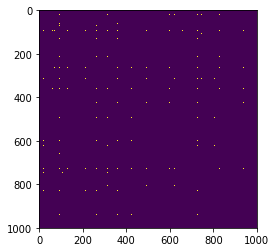

In [300]:
plt.imshow(A-np.eye(len(A))>0.98)

In [301]:
import networkx as nx
G = nx.from_numpy_array(A-np.eye(len(A))>0.98)

In [322]:
[_ for _ in list(nx.connected_components(G)) if (len(_)>2)][0]

{20,
 22,
 23,
 24,
 28,
 31,
 39,
 49,
 58,
 61,
 71,
 76,
 79,
 90,
 94,
 105,
 107,
 108,
 113,
 117,
 121,
 125,
 126,
 127,
 128,
 130,
 142,
 146,
 147,
 154,
 163,
 164,
 172,
 174,
 180,
 186,
 210,
 213,
 224,
 228,
 230,
 234,
 238,
 241,
 262,
 263,
 269,
 276,
 283,
 284,
 285,
 288,
 301,
 314,
 319,
 326,
 344,
 345,
 347,
 360,
 368,
 372,
 375,
 381,
 382,
 386,
 393,
 394,
 404,
 405,
 417,
 424,
 434,
 441,
 443,
 462,
 466,
 478,
 486,
 487,
 493,
 505,
 506,
 509,
 522,
 564,
 569,
 582,
 588,
 590,
 591,
 593,
 598,
 614,
 621,
 624,
 658,
 659,
 675,
 677,
 684,
 695,
 699,
 702,
 703,
 709,
 726,
 727,
 728,
 732,
 745,
 747,
 759,
 763,
 764,
 773,
 776,
 777,
 805,
 806,
 827,
 837,
 839,
 853,
 857,
 862,
 868,
 871,
 875,
 880,
 882,
 884,
 893,
 894,
 899,
 914,
 935,
 938,
 942,
 946,
 949,
 972,
 977,
 978,
 998}

In [8]:
pil_im = Image.open('Alexander/'+files[random_idx_list[105]])
pil_im.thumbnail((224, 224))
pil_im.convert("P")

NameError: name 'random_idx_list' is not defined

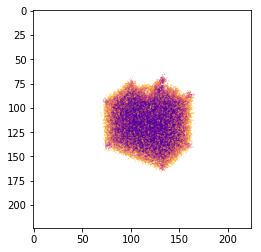

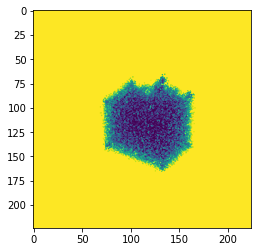

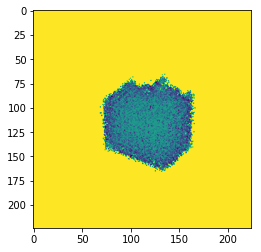

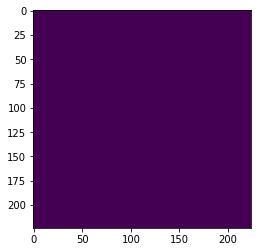

In [328]:
plt.imshow(pil_im)
plt.show()
plt.imshow(np.array(pil_im)[:,:,1])
plt.show()
plt.imshow(np.array(pil_im)[:,:,2])
plt.show()
plt.imshow(np.array(pil_im)[:,:,3])
plt.show()

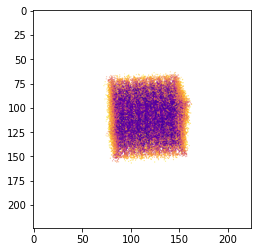

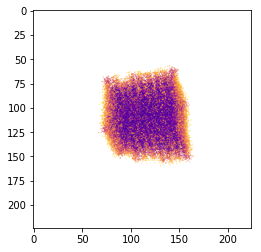

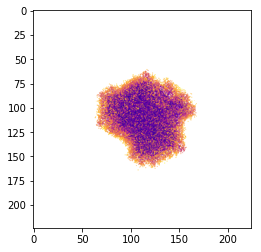

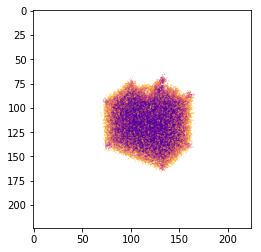

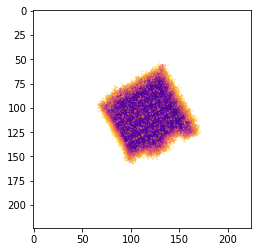

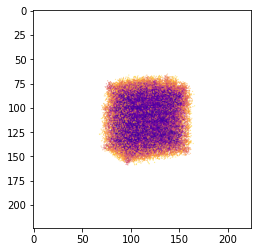

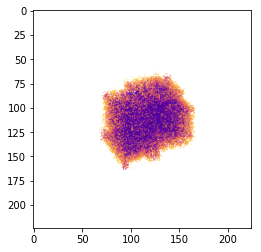

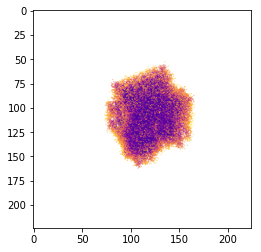

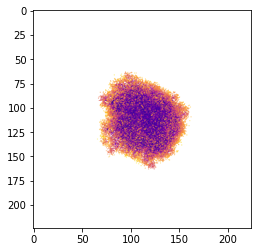

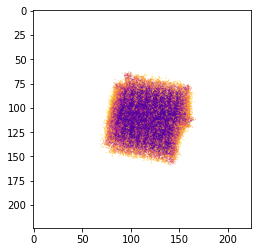

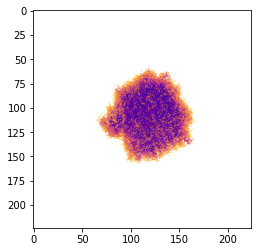

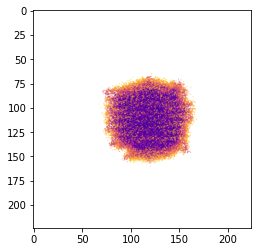

In [352]:
for _ in [_ for _ in list(nx.connected_components(G)) if (len(_)>2)][0]:
    pil_im = Image.open('Alexander/'+files[random_idx_list[_]])
    pil_im.thumbnail((224, 224))
    #print(pil_im.entropy())
    if pil_im.entropy() > 3.15:
        pil_im.thumbnail((224, 224))
        plt.imshow(pil_im)
        plt.show()

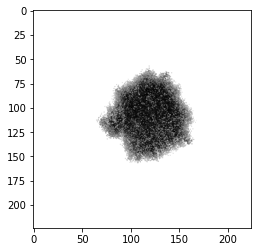

In [321]:
plt.imshow(255-np.array(pil_im.convert("L")), cmap='binary')

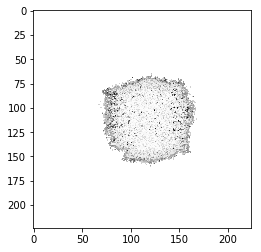

In [368]:
plt.imshow(np.array(pil_im.convert(mode='P')), cmap='binary')

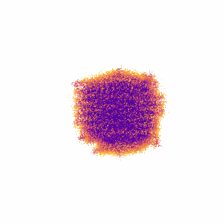

In [369]:
pil_im.convert(mode='P')

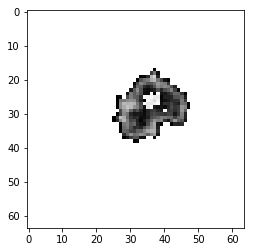

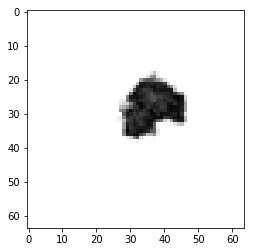

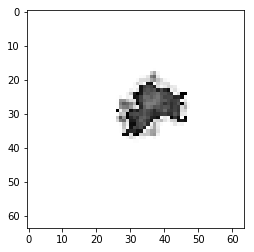

[-4.8591  2.922 ]


In [447]:
IDX = np.random.randint(0, len(files))
pil_im = Image.open('Alexander/'+files[IDX])
pil_im.thumbnail((64, 64))
R = np.array(pil_im)[:,:,0]
G = np.array(pil_im)[:,:,1]
B = np.array(pil_im)[:,:,2]

plt.imshow((B-R)/2, cmap='binary')
plt.show();
plt.imshow((R-G)/2, cmap='binary')
plt.show();
plt.imshow((G-B)/2, cmap='binary')
plt.show();
print(labels[IDX])

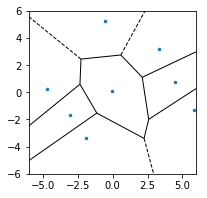

KeyboardInterrupt: 

In [101]:
from scipy import spatial as sp
import numpy as np
count = 0
while True:
    points = np.random.uniform(-6, 6, (8, 2))
    vor = sp.Voronoi(points, qhull_options='Qc')
    stat = []
    for i in range(10000):
        stat.append(get_region_label(np.random.uniform(-6,6, 2)))
    if np.min(np.diff(np.where(np.diff(sorted(stat))>0)[0]))>1200:
        count += 1
        res = sp.voronoi_plot_2d(vor, point_size=5, show_vertices=False)
        res.set_figheight(3)
        res.set_figwidth(3)
        plt.xlim((-6,6))
        plt.ylim((-6,6));
        plt.show()
        plt.close()
    if count>10:
        break

In [156]:
points = np.random.uniform(-6, 6, (8, 2))
def get_minimal_area_of_region(points):
    vor = sp.Voronoi(points, qhull_options='Qc')
    stat = []
    for i in range(10000):
        stat.append(get_region_label(np.random.uniform(-6,6, 2)))
    return np.min(np.diff(np.where(np.diff(sorted(stat))>0)[0]))

In [113]:
points = np.random.uniform(-6, 6, (8, 2))

In [510]:
def get_energy(points):
    dist = np.zeros((len(points), len(points)))
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i>j:
                dist[i, j] = (points[i, 0]-points[j, 0])**2 + (points[i, 1]-points[j, 1])**2
    dist = dist.flatten()
    return np.max(1/(np.abs(dist[dist>0])))+(max(np.max(points), 5.2)-min(np.min(points), -5.2)-10.4)**2-np.log(1+dist.sum())

In [522]:
points = np.random.uniform(-6, 6, (14, 2))
old_points = np.copy(points)
ene = get_energy(points)

In [529]:
#r = [[] for _ in range(len(points))]
LENG = len(points)
boundary = 1
def evolve(points, N=1000):
    LENG = len(points)
    ene = get_energy(points)
    for ewt in range(N):
        alpha = np.random.uniform(0, min(1, 10/np.log(2+ewt)))
        new_points = (1-alpha)*points+alpha*np.random.uniform(-6, 6, (LENG, 2))
        if ewt%3==0:
            alpha = np.exp(np.random.uniform(-10, 0))
            new_points = points+alpha*np.random.uniform(-6, 6, (LENG, 2))

        try_ene = get_energy(new_points)
        if try_ene<ene:
            points = np.copy(new_points)
            ene = np.copy(try_ene)
            #print(ene)
            #for _ in range(len(points)):
                #r[_].append(list(points[_]))
    return points

_---_ 0

h:  0

0 1 2 3 4 5 6 7 8 9 10 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
0 1 2 3 4 5 6 
0 1 
energy: -8.327278693292904

h:  1

0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 10 
0 1 2 3 4 5 6 7 8 9 
energy: -8.352610409793213

h:  2

0 
0 1 2 3 4 5 6 
0 1 2 3 4 5 6 
0 1 2 3 4 5 6 7 8 9 
energy: -8.37641193109479

h:  3

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 
0 1 2 3 
0 1 2 3 4 5 6 
energy: -8.37641193109479

h:  4

0 1 2 3 
0 1 2 3 4 5 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 
energy: -8.37641193109479

h:  5

0 1 2 3 4 5 6 7 8 9 10 11 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 
0 1 2 3 4 5 6 7 
energy: -8.37641193109479

h:  6

0 1 2 3 
0 1 2 3 4 5 
0 1 2 3 4 5 6 7 8 9 10 11 
0 1 2 3 4 5 6 7 8 9 10 
energy: -8.37641193109479

h:  7

0 1 2 3 4 5 6 7 8 9 10 11 12 13 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 
0 1 2 3 4 5 6 7 8 9 10 11 12 
energy: -8.37641193109479

h:  8

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
0 1 2 3 4 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 
0 1 2 3 4 5 6 
energy: -

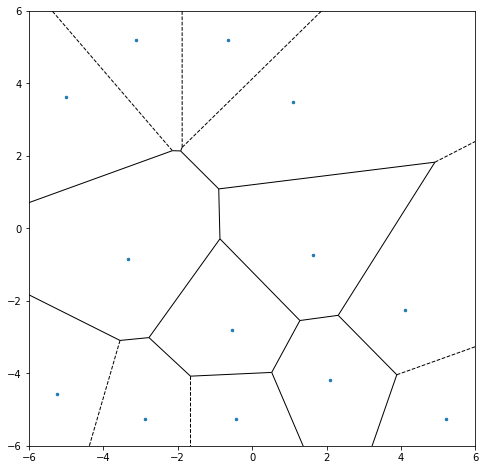

In [963]:
N_POINTS = 13

production_points = []

for wey in range(1):
    print('_---_', wey)
    best_points = []
    for h in range(15):
        print()
        print("h: ", h)
        print()
        for j in range(np.random.randint(3, 5)):
            points_1 = evolve(np.random.uniform(-6, 6, (N_POINTS, 2)), N=np.random.randint(4000, 4100*(h+1)))
            points_2 = evolve(np.random.uniform(-6, 6, (N_POINTS, 2)), N=np.random.randint(4000, 4100*(h+1)))

            if get_energy(points_1) < get_energy(points_2):
                points = evolve(points_1)
            else:
                points = evolve(points_2)
            for _ in range(np.random.randint(1, 20)):   
                print(_, end=' ')
                points_1 = evolve(points, N=np.random.randint(300, 310))
                points_2 = evolve(points+np.exp(np.random.uniform(-10, 2))*np.random.uniform(-6, 6, (N_POINTS, 2)), N=np.random.randint(300, 310))
                if get_energy(points_1) < get_energy(points_2):
                    points = evolve(points_1, N=np.random.randint(300, 310))
                else:
                    points = evolve(points_2, N=np.random.randint(300, 310))
            print()
            best_points.append(points)
            score = np.array([get_energy(_) for _ in best_points])
            
            counter = 0
            for _ in (score>np.median(score)):
                if _ == True:
                    best_points[counter] = evolve(best_points[counter], N=10000)
                counter += 1
        print('energy:',np.min([get_energy(_) for _ in best_points]))
    print('End')

    from scipy import spatial as sp
    import numpy as np
    count = 0
    production_points.append(points)
    vor = sp.Voronoi(points, qhull_options='Qc')
    res = sp.voronoi_plot_2d(vor, point_size=5, show_vertices=False)
    res.set_figheight(8)
    res.set_figwidth(8)
    plt.xlim((-6,6))
    plt.ylim((-6,6));
    plt.show()
    plt.close()
    

-8.236325233435506


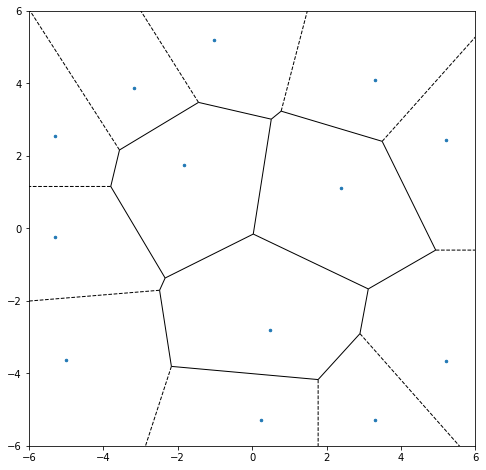

-8.267502542280559


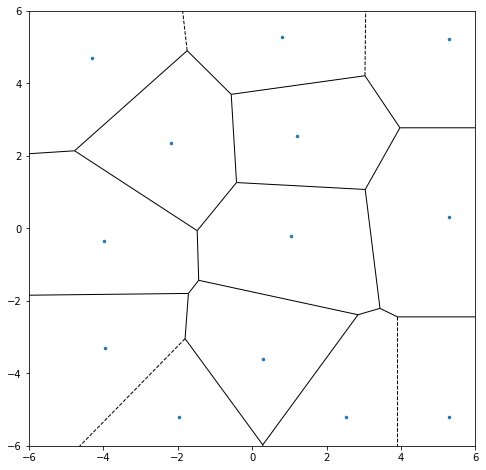

-8.265821380710106


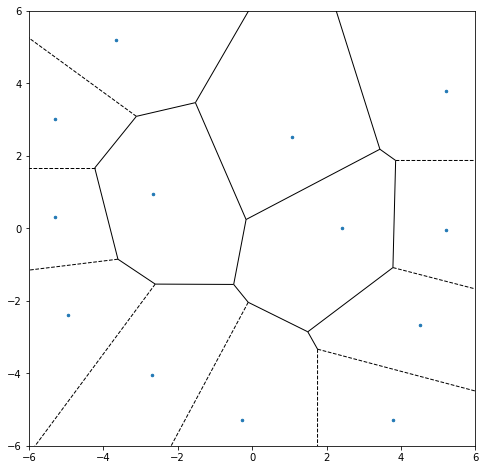

-8.22641623026216


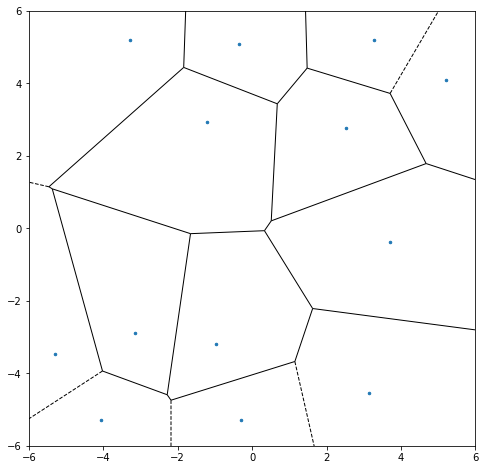

-8.297739678718258


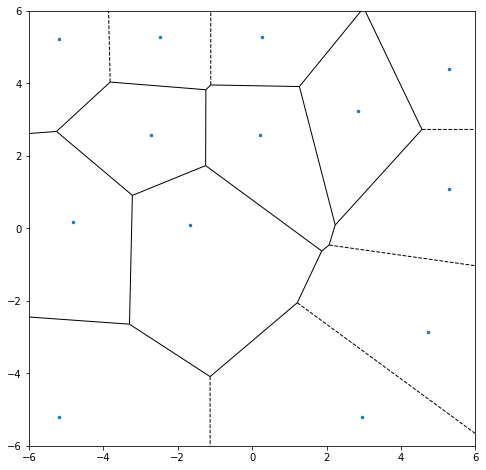

-8.244253722676572


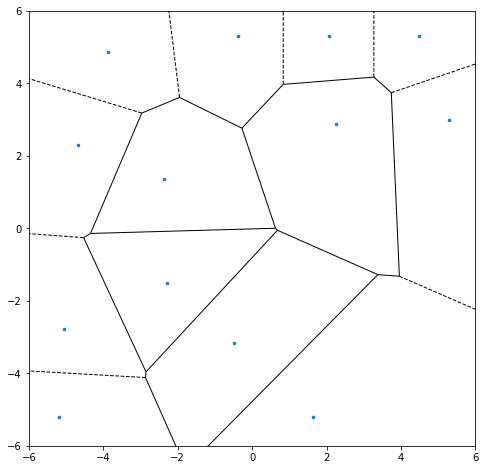

-8.304392042009974


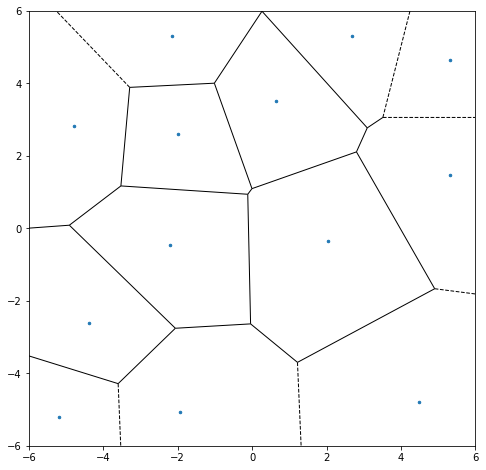

-8.242706938486872


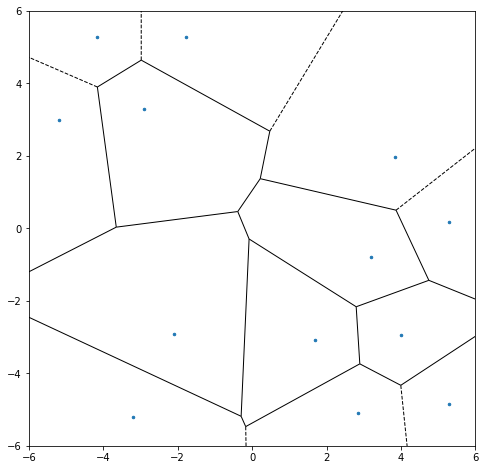

-8.309301602143854


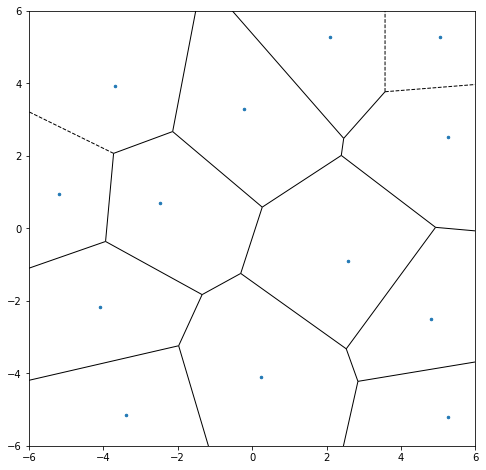

-8.216490797981827


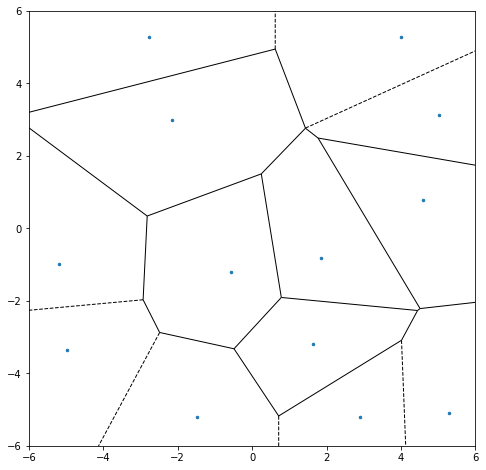

-8.299296455089173


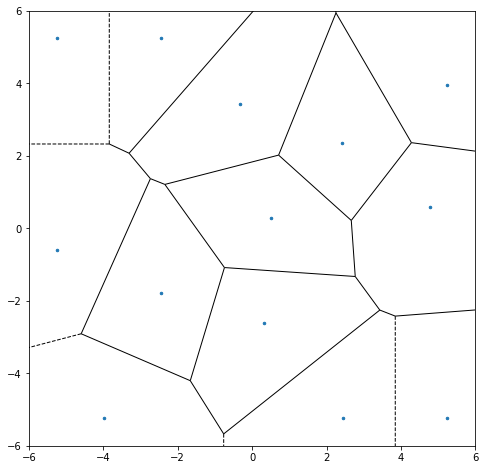

-8.203156987355635


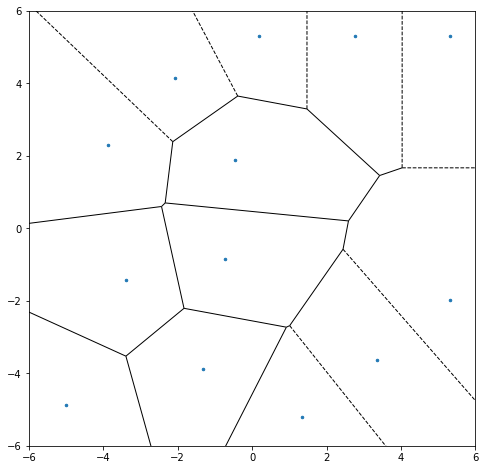

-8.210523388276647


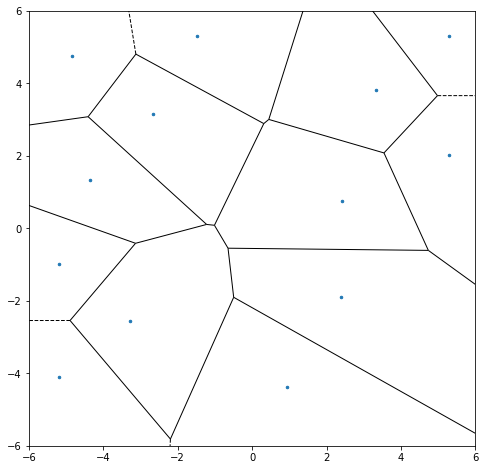

-8.285486367411664


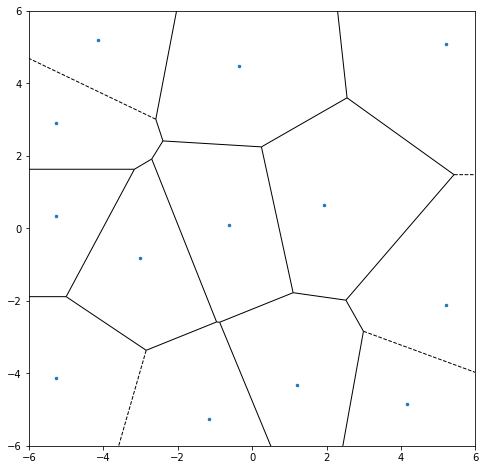

-8.21962337978955


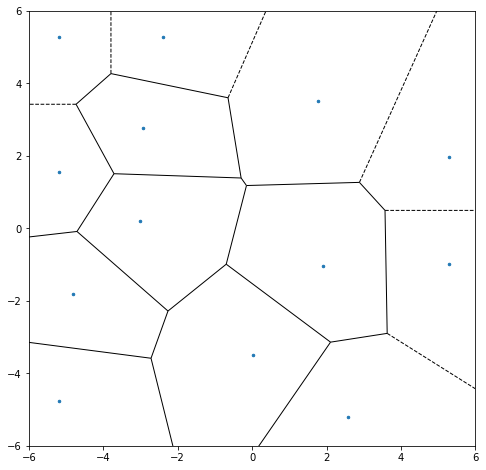

-8.15025258327807


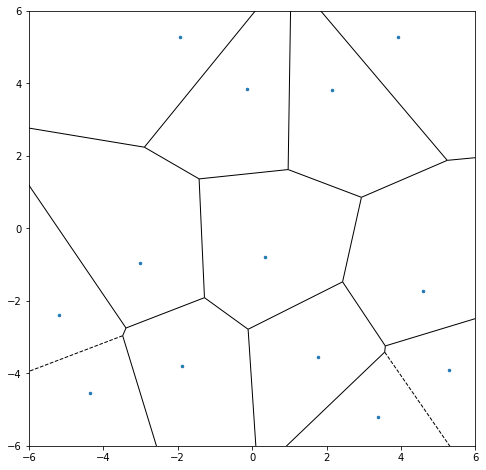

-8.288055317118774


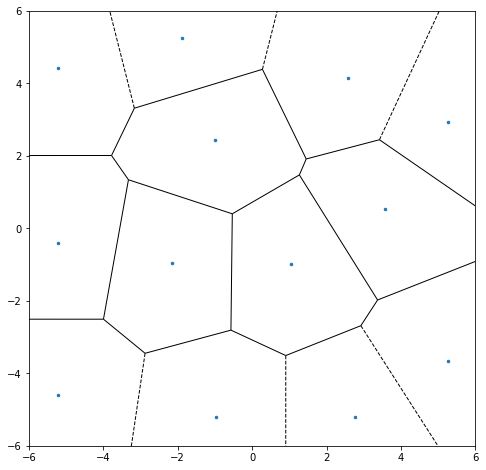

-8.249610719626515


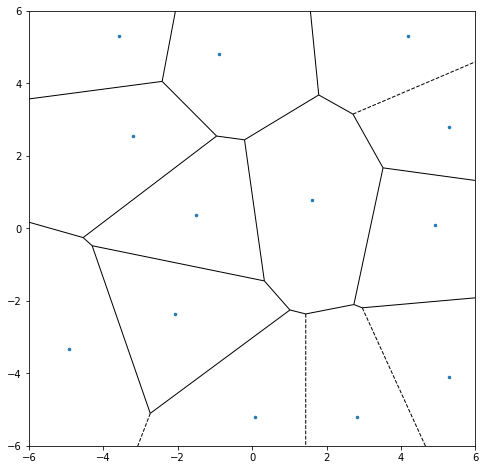

-8.23045022403056


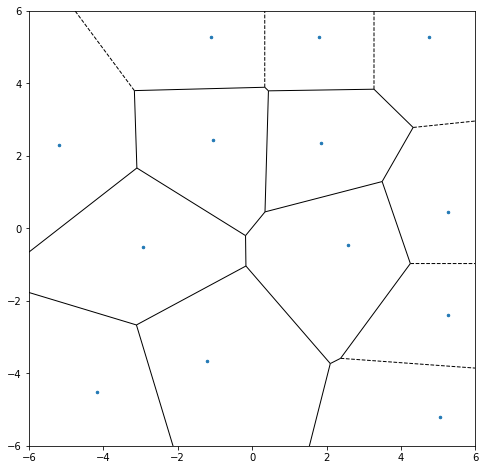

-8.3044423925696


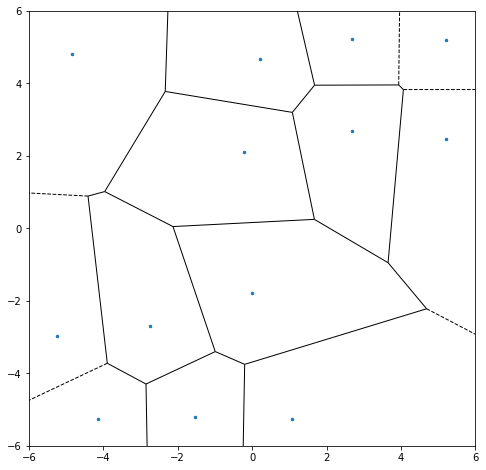

-8.296252575562848


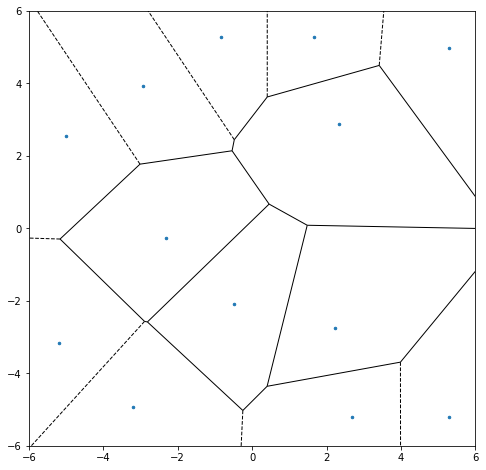

-8.223226521882063


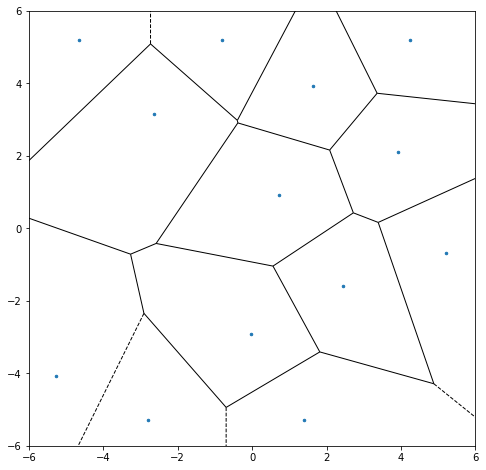

-8.25773263219334


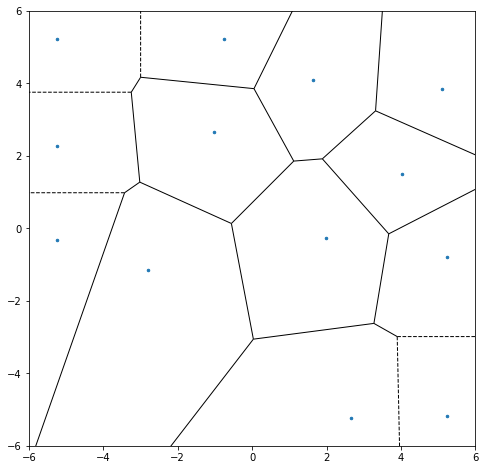

-8.18451911333096


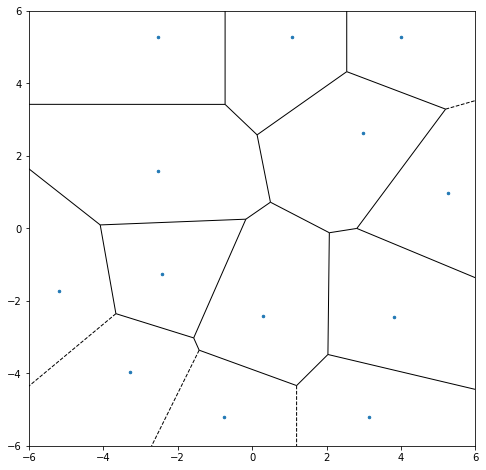

-8.244932461941106


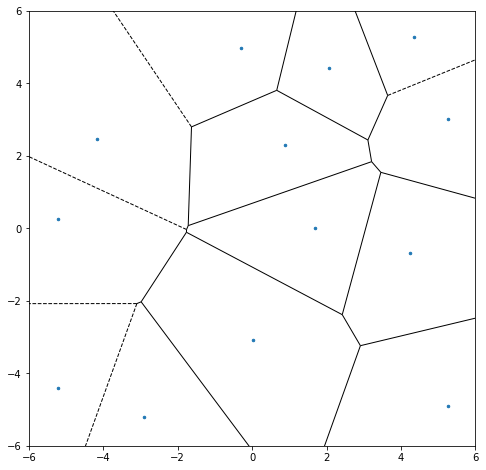

-8.200801240712098


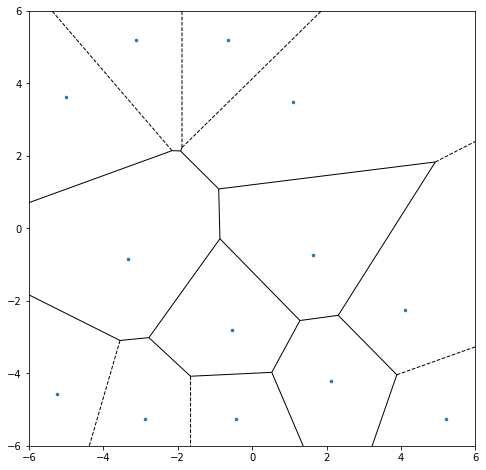

In [964]:
score = np.array([get_energy(_) for _ in best_points])

counter = 0
for _ in (score>np.median(score)):
    if _ == True:
        print(get_energy(best_points[counter]))
        vor1 = sp.Voronoi(best_points[counter], qhull_options='Qc')
        res = sp.voronoi_plot_2d(vor1, point_size=5, show_vertices=False)
        res.set_figheight(8)
        res.set_figwidth(8)
        plt.xlim((-6,6))
        plt.ylim((-6,6));
        plt.show()
        plt.close()
    counter += 1

In [965]:
points = best_points[np.argmin(score)]

In [992]:
for i in range(100000):
    points = evolve(points, N=100000)
    print(i, get_energy(points))

0 -8.524069149009446
1 -8.524069149009446
2 -8.524069149009446
3 -8.524069149009446
4 -8.524069149009446
5 -8.524069149009446
6 -8.524069149009446
7 -8.524069149009446
8 -8.524069149009446
9 -8.524069149009446
10 -8.524069149009446
11 -8.524069149009446
12 -8.524069149009446
13 -8.524069149009446
14 -8.524069149009446
15 -8.524069149009446
16 -8.524069149009446
17 -8.524069149009446
18 -8.524069149009446
19 -8.524069149009446
20 -8.524069149009446
21 -8.524069149009446
22 -8.524069149009446
23 -8.524074671548604
24 -8.524096356075562
25 -8.524114448816162
26 -8.524114448816162
27 -8.524114448816162
28 -8.524114448816162
29 -8.524114448816162
30 -8.524114448816162
31 -8.524114448816162
32 -8.524114448816162
33 -8.524114448816162
34 -8.524114448816162
35 -8.524114448816162
36 -8.524114448816162
37 -8.524114448816162
38 -8.524115351504799
39 -8.524115351504799
40 -8.524137791446496
41 -8.524239197780979
42 -8.524331899139694
43 -8.524331899139694
44 -8.524332587386592
45 -8.52433258738659

KeyboardInterrupt: 

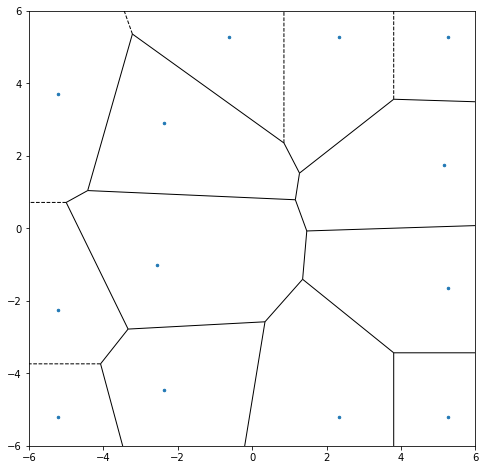

In [993]:
vor1 = sp.Voronoi(points, qhull_options='Qc')
res = sp.voronoi_plot_2d(vor1, point_size=5, show_vertices=False)
res.set_figheight(8)
res.set_figwidth(8)
plt.xlim((-6,6))
plt.ylim((-6,6));
plt.show()
plt.close()

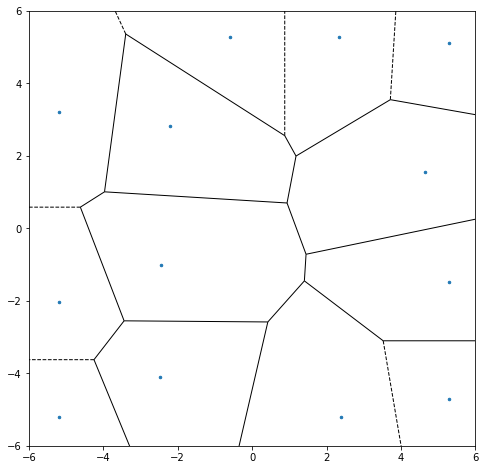

In [982]:
vor1 = sp.Voronoi(points, qhull_options='Qc')
res = sp.voronoi_plot_2d(vor1, point_size=5, show_vertices=False)
res.set_figheight(8)
res.set_figwidth(8)
plt.xlim((-6,6))
plt.ylim((-6,6));
plt.show()
plt.close()

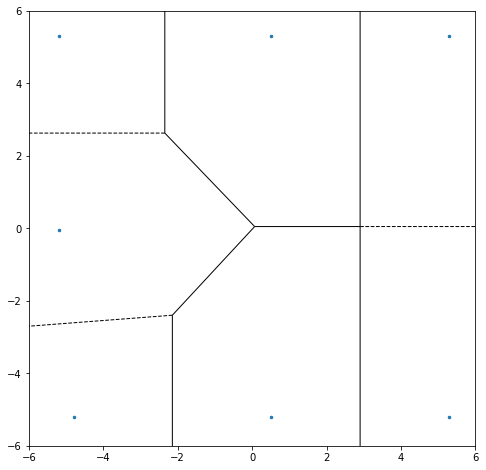

In [962]:
vor1 = sp.Voronoi(points, qhull_options='Qc')
res = sp.voronoi_plot_2d(vor1, point_size=5, show_vertices=False)
res.set_figheight(8)
res.set_figwidth(8)
plt.xlim((-6,6))
plt.ylim((-6,6));
plt.show()
plt.close()

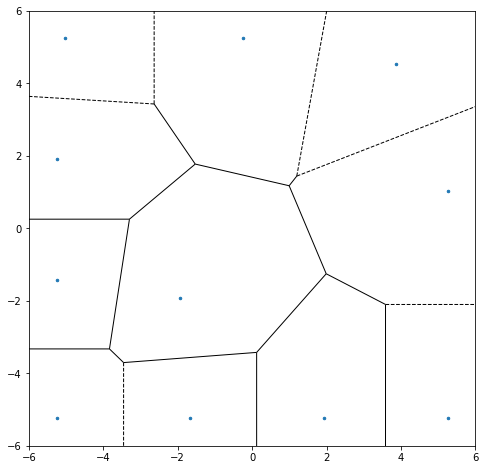

In [920]:
vor = sp.Voronoi(points, qhull_options='Qc')
res = sp.voronoi_plot_2d(vor, point_size=5, show_vertices=False)
res.set_figheight(8)
res.set_figwidth(8)
plt.xlim((-6,6))
plt.ylim((-6,6));
plt.show()
plt.close()

In [1081]:
e = 0.6

N = 500

def E(n):
    return (2*n-N)*e

In [1082]:
np.sum([np.exp(-E(n)) for n in range(0, N+1)])

2.7796369582977877e+130

In [1083]:
np.exp(N*e)*(1-np.exp(-2*e*(N+1)))/(1-np.exp(-2*e))

2.779636958297789e+130

In [1084]:
(np.exp(N*e)-np.exp(-(N-2)*e))/(1-np.exp(-2*e))

2.779636958297789e+130

In [1085]:
np.exp(N*e)*(np.exp(-2*e)+1)**N

2.880089238128467e+187

In [1086]:
np.log(np.sum([np.exp(-E(n)) for n in range(0, N+1)]))

300.3583824178604

In [1087]:
N*e+np.exp(-2*e)

300.3011942119122

In [1090]:
E_mean = -N*e+2*e*np.exp(-2*e)

In [1091]:
E_mean

-299.63856694570535

In [1095]:
-2*e*1/(np.log((E_mean+N*e)/(2*e)))

1.0000000000000184

In [1094]:
E_mean+N*e

0.36143305429465045

In [1096]:
-2*e*1/np.log((N+E_mean/e)/(N-E_mean/e))

0.16185582751304828

In [1005]:
q = 0.3786523
sum([q**n for n in range(0, N+1)])

1.6094048467943631

In [1006]:
(1-q**(N+1))/(1-q)

1.6094048467943631

In [1097]:
(N+E_mean/e)/(N-E_mean/e)

0.000602751514359072

In [ ]:
(N+E_mean/e)/(N-E_mean/e)

In [875]:
np.array(production_points).shape

(128, 13, 2)

In [882]:
production_points[0]

array([[ 2.8918441 , -4.92580175],
       [ 0.60657787, -4.11665811],
       [ 5.28169298,  2.92012478],
       [-2.82544185,  5.05325194],
       [-5.19799221,  4.65494591],
       [ 2.85368251,  3.858076  ],
       [-0.43267168,  1.98918802],
       [-4.97269656,  2.10887545],
       [ 4.81641978,  5.27939685],
       [-0.91211464, -0.9108407 ],
       [-4.95144481, -4.62699663],
       [-4.77142129, -2.16123094],
       [ 5.28151936, -5.19412371]])

In [883]:
production_points[1]

array([[ 3.99246961,  5.22592121],
       [ 3.80642433,  0.83451946],
       [-4.4397931 , -2.56086509],
       [-1.18505502,  4.68851736],
       [-4.21009391,  3.86072715],
       [ 2.69137756, -5.19048394],
       [ 3.74469974, -2.87454295],
       [ 2.01268615,  3.16811001],
       [-5.13221919,  1.27369577],
       [-5.20976433, -5.16824979],
       [ 5.24594862,  2.92927598],
       [ 5.23706629, -5.20089067],
       [-2.78481874, -0.11971732]])

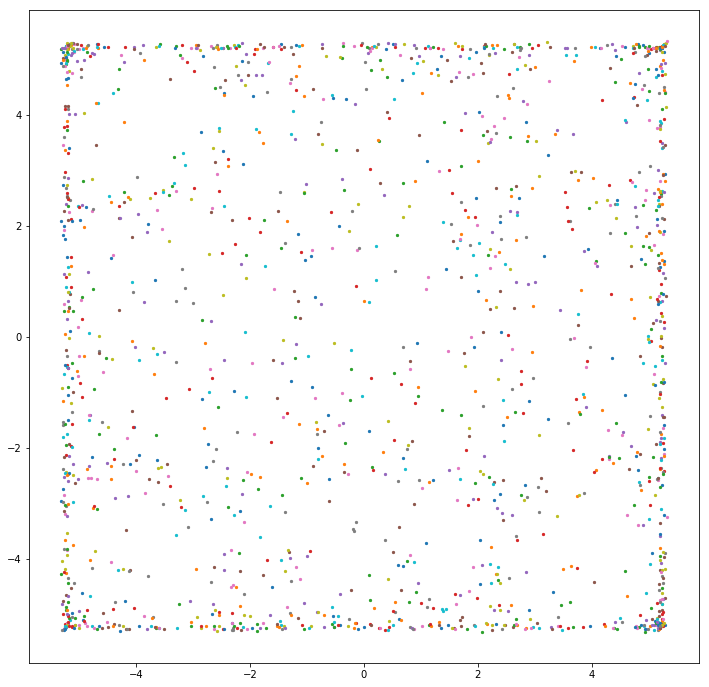

In [889]:
plt.figure(figsize=(12,12))
for poinr in production_points:
    plt.scatter(poinr[:,0], poinr[:,1], s=5)
plt.show();

In [771]:
investigation = []
points = []
for _ in range(12):
    temp_point = evolve(np.random.uniform(-6, 6, (N_POINTS, 2)), N=30)
    points.append(temp_point)

points = np.array(points)
a = len(points)
score  = np.array([get_energy(_) for _ in points])
points = points[score>np.median(score)]
b = len(points)
points = list(points)
for _ in range(a-b):
    temp_point = evolve(np.random.uniform(-6, 6, (N_POINTS, 2)), N=30)
    points.append(temp_point)

In [791]:
for _ in range(len(points)):
    alpha = np.exp(np.random.uniform(-2, -0.1))
    temp_point = (1-alpha)*points[_]+alpha*np.random.uniform(-6, 6, (N_POINTS, 2))
    points.append(temp_point)
    
points = np.array(points)
a = len(points)
score  = np.array([get_energy(_) for _ in points])
points = points[score>np.median(score)]
b = len(points)
points = list(points)

In [792]:
np.min([get_energy(_) for _ in points])

5.914074262227288

In [ ]:
for _ in range(a-b):
    temp_point = evolve(np.random.uniform(-6, 6, (N_POINTS, 2)), N=30)
    points.append(temp_point)

In [751]:
for q in range(10): 
    points = list(points)
    for _ in range(len(points)):
        alpha = np.exp(np.random.uniform(-2, -0.1))
        temp_point = (1-alpha)*points[_]+alpha*np.random.uniform(-6, 6, (N_POINTS, 2))
        points.append(temp_point)


    print(np.min([get_energy(_) for _ in points]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 14

In [757]:
points = np.array(points)
score  = np.array([get_energy(_) for _ in points])
points = points[score>np.median(score)]

In [729]:
np.min([get_energy(_) for _ in points])

-4.390936791260054

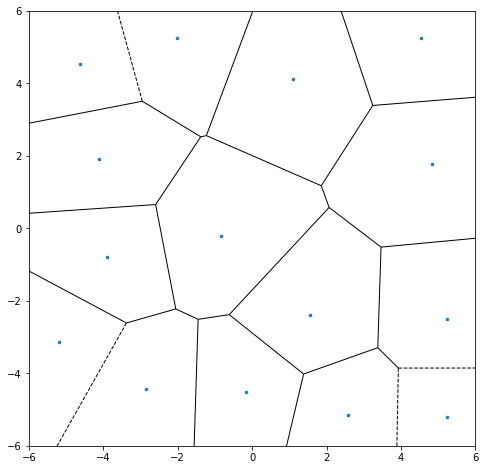

In [609]:
from scipy import spatial as sp
import numpy as np
count = 0

vor = sp.Voronoi(points, qhull_options='Qc')
res = sp.voronoi_plot_2d(vor, point_size=5, show_vertices=False)
res.set_figheight(8)
res.set_figwidth(8)
plt.xlim((-6,6))
plt.ylim((-6,6));
plt.show()
plt.close()

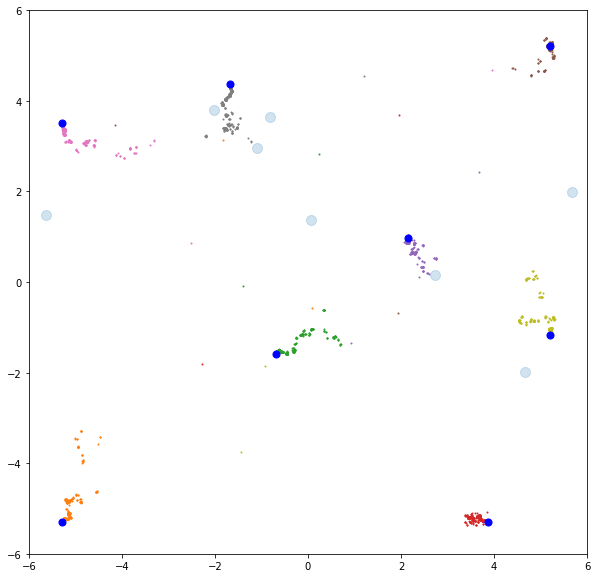

In [496]:
r = np.array(r)
plt.figure(figsize=(10,10))

plt.scatter(old_points[:,0], old_points[:,1], s=100, alpha=0.2)
for i in range(len(r)):
    plt.scatter(r[i,:,0], r[i,:,1], s=1)
plt.scatter(points[:,0], points[:,1], s=50, c='blue')
plt.xlim((-6,6))
plt.ylim((-6,6));

In [4]:
from scipy import spatial as sp

In [72]:
def get_region_label(new_point):
    return np.argmin([(_[0]-new_point[0])**2+(_[1]-new_point[1])**2 for _ in points])

In [75]:
stat = []
for i in range(2000):
    stat.append(get_region_label(np.random.uniform(-6,6, 2)))

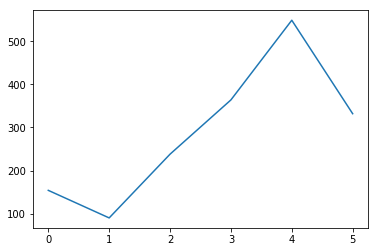

In [85]:
plt.plot(np.diff(np.where(np.diff(sorted(stat))>0)[0]));

In [86]:
np.min(np.diff(np.where(np.diff(sorted(stat))>0)[0]))

90

In [83]:
np.where(np.diff(sorted(stat))>0)[0]

array([ 128,  282,  372,  610,  974, 1523, 1855], dtype=int64)

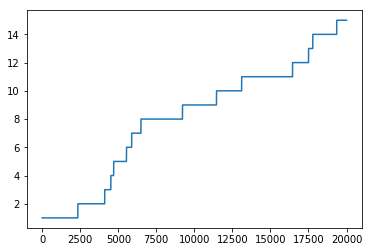

In [712]:
plt.plot(sorted(stat));